In [162]:
#make sure you have itchat install by "pip install itchat" in terminal
import itchat, time
from itchat.content import *
import pandas as pd
import numpy as np
import time
import datetime

In [163]:
#确保打卡群保存到通讯录

### 1. 打卡
- 1. 扫描二维码登陆
- 2. 确保打卡群已经保存到通讯录
- 3. run下面这个instance "day",确保群名称是对的 

In [160]:
today = []
#这是一个记录今天打卡member的list

#创建一个新的打卡object

day = itchat.new_instance()
day.auto_login(hotReload=True,enableCmdQR=2)

#每次被at就回复“收到打卡” 只是在指定的群内，非指定群不影响
@day.msg_register(TEXT, isGroupChat = True)
def test(msg):
    if (msg.IsAt==True) & (msg["User"]["NickName"]=="汪采薇求职群"):#这里换成群的昵称
        print(msg["Text"])
        #记录在list里今天打卡的人
        today.append(msg.actualNickName)
        msg.user.send(u'@%s\u2005收到打卡' % (
            msg.actualNickName))
        print(today)
        #msg 打卡天数
    
        
        
#先跑这个，会出现二维码，扫描后，登陆，登陆完毕跑下面这行run。想要结束请按“stop”键


In [161]:
day.run()

Start auto replying.


{'MsgId': '3607936874566009330', 'FromUserName': '@@238c826ecf6288dbb53ed6af57e2f3d81a619a8f230431219cc25687b52f07ab', 'ToUserName': '@81d975e0bee7cce64098ce11037717dad148fc999c0a4af049dc64400cb3ea08', 'MsgType': 1, 'Content': '@wendywwww', 'Status': 3, 'ImgStatus': 1, 'CreateTime': 1587035993, 'VoiceLength': 0, 'PlayLength': 0, 'FileName': '', 'FileSize': '', 'MediaId': '', 'Url': '', 'AppMsgType': 0, 'StatusNotifyCode': 0, 'StatusNotifyUserName': '', 'RecommendInfo': {'UserName': '', 'NickName': '', 'QQNum': 0, 'Province': '', 'City': '', 'Content': '', 'Signature': '', 'Alias': '', 'Scene': 0, 'VerifyFlag': 0, 'AttrStatus': 0, 'Sex': 0, 'Ticket': '', 'OpCode': 0}, 'ForwardFlag': 0, 'AppInfo': {'AppID': '', 'Type': 0}, 'HasProductId': 0, 'Ticket': '', 'ImgHeight': 0, 'ImgWidth': 0, 'SubMsgType': 0, 'NewMsgId': 3607936874566009330, 'OriContent': '', 'EncryFileName': '', 'ActualNickName': 'cool', 'IsAt': True, 'ActualUserName': '@791dfb653e4e32b180b2c09c286e871d84754414fd9aa13f4e2cb54c

Bye~


In [70]:
# day.auto_login(hotReload=True,enableCmdQR=2)


#1. check if there is new people in group chat today
#replace group name to 打卡群
chatroom = day.search_chatrooms(name = "汪采薇求职群")
#current member amount

members = chatroom[0]["MemberList"]
number = len(members)
#check if there is new member
currentMember = [i["UserName"] for i in members]


#update the lastTime
today = datetime.date.today()
studentTable.loc[studentTable[""]]

### 2. 获取好友信息

- 1. 好友城市分布
- 2. 好友性别分布

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import re
from scipy.misc import imread  
#import 所有的画图工具

In [171]:
#创建一个新的好友object
friends = itchat.new_instance()
friends.auto_login(hotReload=True,enableCmdQR=2)

In [189]:
myFriends = friends.get_friends(update=True)
#获取好友列表

In [191]:
df = pd.DataFrame(myFriends)
#创建dataframe

0       北京
1    Bengo
2         
3       北京
4         
Name: Province, dtype: object

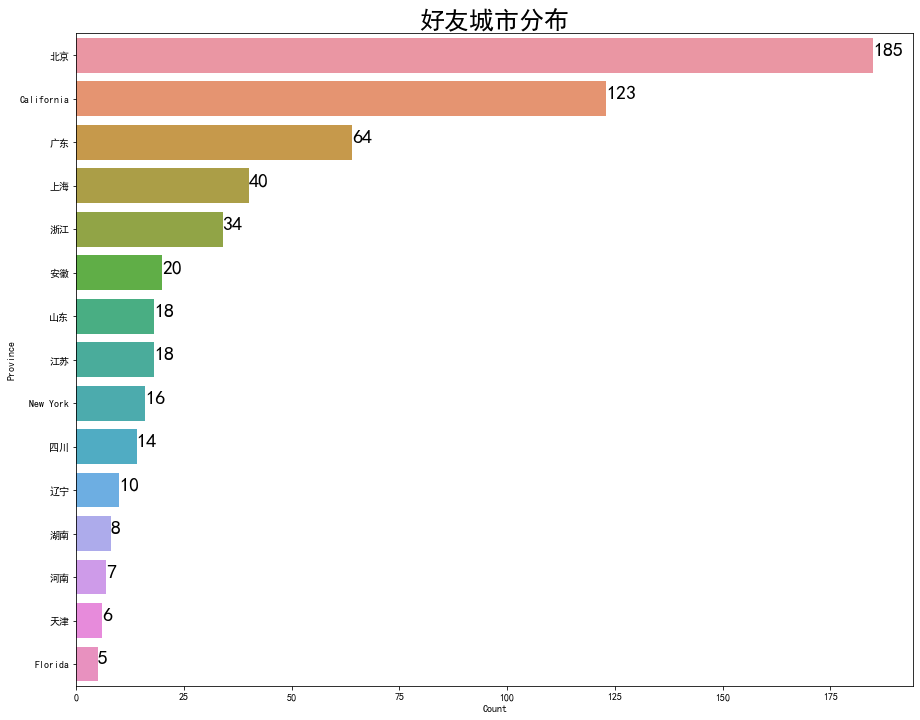

In [192]:
#查看好友省份分布
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize = (15,12))
data_temp = df.loc[df['Province']!='']
data_temp = data_temp.groupby(['Province'])['UserName'].count().reset_index()
data_temp = data_temp.nlargest(15,'UserName')
data_temp.columns = ['Province','Count']
sns.barplot(data=data_temp ,y='Province',x='Count')
for y,x in enumerate(data_temp['Count']):
    plt.text(x,y,x,fontsize = 20)
plt.title(u'好友城市分布',fontsize =25)
plt.show()

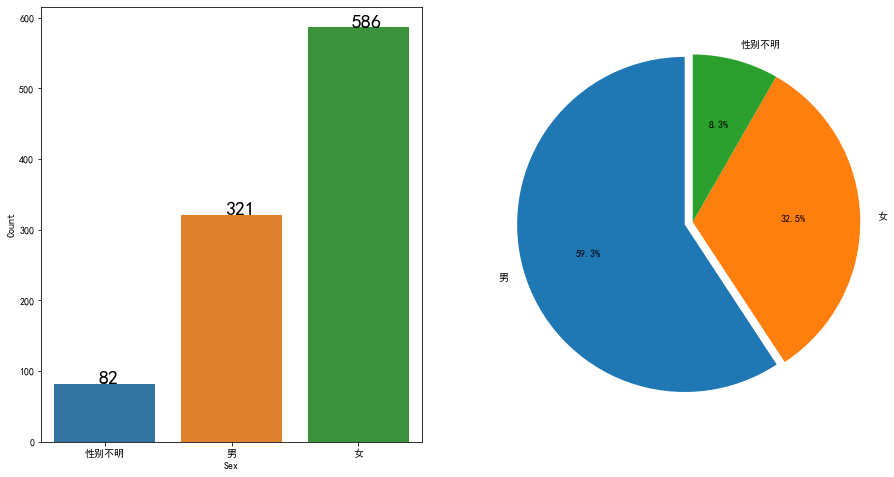

In [203]:
#查看好友性别分布

df['Sex'] = df['Sex'].replace({0:u'性别不明',1:u'男',2:u'女'})
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
data_temp = df.groupby(['Sex'])['UserName'].count().reset_index()
data_temp = data_temp.sort_values('UserName')
data_temp.columns = ['Sex','Count']
sns.barplot(data=data_temp ,x='Sex',y='Count')
for x,y in enumerate(data_temp['Count']):
    plt.text(x-0.05,y,y,fontsize = 20)
plt.subplot(1,2,2)
sex_list = [u'男',u'女',u'性别不明']
countlist = df["Sex"].value_counts().values
explode = (0.05,0,0)
plt.pie(countlist,labels = sex_list,explode =explode,startangle = 90,autopct = '%3.1f%%')
plt.axis('equal')
plt.show()

array([586, 321,  82], dtype=int64)